# Pratical excersice 1: Chest and breast classification

Before you start to solve the exercise, please write your TUM-IDs alongside the names of all group members. This will enable us to assign grades accurately. Thank you.

Member 1: Mohammed Elbushnaq (03786474)

Member 2: Evangelos Fragkiadakis (03784680)

Member 3: Muhammed Elmasry (03786399)

Member 4: Nada Elsherbeny (03788337) 

In [1]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from matplotlib import pyplot as plt

import medmnist
from medmnist import INFO

## Task 1: 2D breast ultrasound classification.

## Dataloading
We first load a 2D dataset breast ultrasound dataset-BreastMNIST, preprocess it and encapsulate it into dataloader form. Please fill the empty blanks in the following bloacks. You are expected to show the details of training, validation, and test dataset.

In [2]:
data_flag_2d = 'breastmnist' # here the name of dataset should be passed.
download = True

info = INFO[data_flag_2d] # INFO is embedded in the medmnist containing basic information of datasets
print(info)
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

{'python_class': 'BreastMNIST', 'description': 'The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.', 'url': 'https://zenodo.org/record/6496656/files/breastmnist.npz?download=1', 'MD5': '750601b1f35ba3300ea97c75c52ff8f6', 'task': 'binary-class', 'label': {'0': 'malignant', '1': 'normal, benign'}, 'n_channels': 1, 'n_samples': {'train': 546, 'val': 78, 'test': 156}, 'license': 'CC BY 4.0'}


In [3]:
"""
Here goes with the hyperparameters for your model.
"""
# hyparameters
BATCH_SIZE = 32
EPOCH_NUM = 250
lr = 0.0005

In [4]:
"""
Please generate datasets and dataloaders for training, validation, and test dataset.
Datasets should be an object of DataClass and dataloaders should be an object of torch.utils.data.DataLoader.
"""

# preprocessing such as conversion to tensor and normalization

data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data class

DataClass = getattr(medmnist, info['python_class'])

train_dataset = DataClass(split='train', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)

# encapsulate data into dataloader form
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: C:\Users\moham\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\moham\.medmnist\breastmnist.npz
Using downloaded and verified file: C:\Users\moham\.medmnist\breastmnist.npz


Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: C:\Users\moham\.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0
Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: C:\Users\moham\.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 

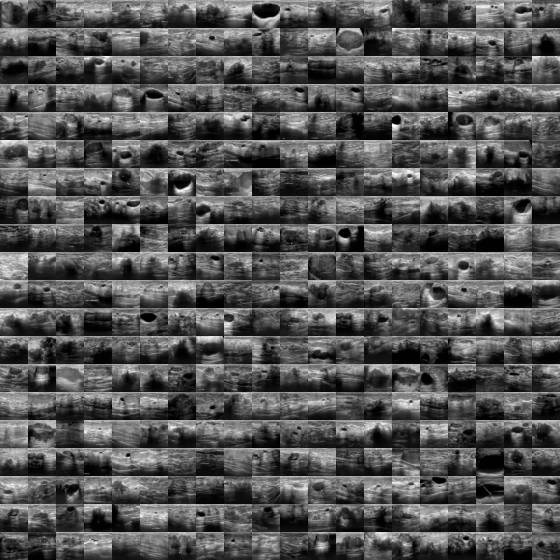

In [5]:
"""
This block shows the details of the datasets you generated above.
"""
print(train_dataset)
print("===================")
print(val_dataset)
print("===================")
print(test_dataset)
train_dataset.montage(length=20)

Please fill the blanks in the following block to show the image and its corresponding class label of 2 subjects:
1. the 50th subject in training dataset
2. the 20th subject in test dataset



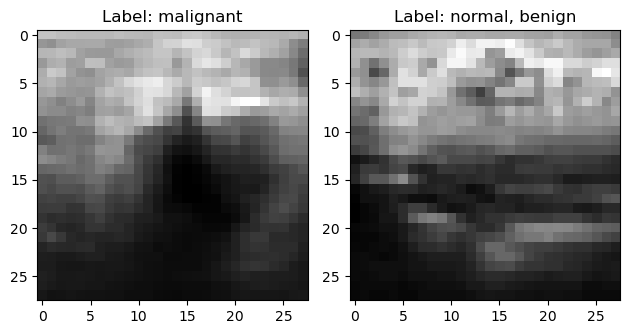

In [6]:
"""
Please query images and labels and visualize both images with labels as title.
"""
# query images and corresponding labels
im_1, label_1 = train_dataset[49][0], train_dataset[49][1]
im_2, label_2 = test_dataset[19][0], test_dataset[19][1]

# visualization
# Create a subplot with 2 rows and 2 columns for displaying the images
fig, axs = plt.subplots(1, 2)

# Display the first image with its label
axs[0].imshow(im_1[0], cmap='gray')  # Assuming it's a grayscale image
axs[0].set_title(f"Label: {info['label'][str(int(label_1))]}")

# Display the second image with its label
axs[1].imshow(im_2[0], cmap='gray')  # Assuming it's a grayscale image
axs[1].set_title(f"Label: {info['label'][str(int(label_2))]}")

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

## Upsampling and downsampling
Upsample the aforementioned subjects with bilinear algorithm from 28$\times$28 to 56$\times$56 and apply a 2D max pooling over the same subjects with kernel size equals 2 and stride equals 2.

**You are expected to use classes implememted in torch.nn.**
*Hit: Pay attention to the dimension of inputs.*


<Figure size 640x480 with 0 Axes>

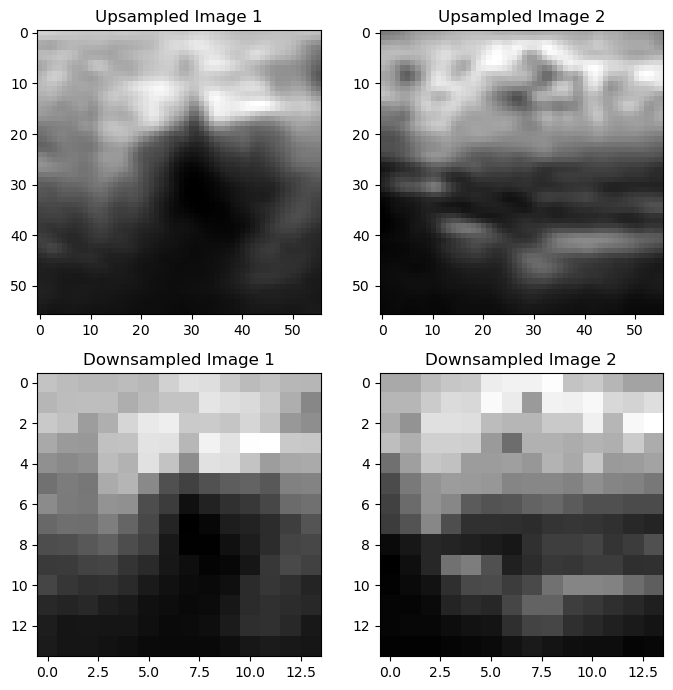

The size of resulted images: torch.Size([1, 1, 56, 56]), torch.Size([1, 1, 56, 56]), torch.Size([1, 1, 14, 14]), torch.Size([1, 1, 14, 14]).


In [7]:
"""
Please realize upsampling and pooling of target images.
Visualize them with 2*2 subplots and print the size of images.

"""

# upsampling
upsampled_im_1 = nn.Upsample(scale_factor=2, mode='bilinear')(im_1.unsqueeze(0))
upsampled_im_2 = nn.Upsample(scale_factor=2, mode='bilinear')(im_2.unsqueeze(0))

# downsampling
pooled_im_1 = nn.MaxPool2d(kernel_size=2, stride=2)(im_1.unsqueeze(0))
pooled_im_2 = nn.MaxPool2d(kernel_size=2, stride=2)(im_2.unsqueeze(0))

# visualization
plt.figure()
f, axarr = plt.subplots(2, 2, figsize=(7, 7))

# Display upsampled images
axarr[0, 0].imshow(upsampled_im_1[0, 0], cmap='gray')
axarr[0, 0].set_title("Upsampled Image 1")
axarr[0, 1].imshow(upsampled_im_2[0, 0], cmap='gray')
axarr[0, 1].set_title("Upsampled Image 2")

# Display downsampled images
axarr[1, 0].imshow(pooled_im_1[0, 0], cmap='gray')
axarr[1, 0].set_title("Downsampled Image 1")
axarr[1, 1].imshow(pooled_im_2[0, 0], cmap='gray')
axarr[1, 1].set_title("Downsampled Image 2")

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()
print(f'The size of resulted images: {upsampled_im_1.shape}, {upsampled_im_2.shape}, {pooled_im_1.shape}, {pooled_im_2.shape}.')

## Model implementation

Here you should implement a basic CNN model with 5 convolutional layers. The output layer should be two linear layers. The output activation is sigmoid function.

Define a loss criterion that measures the Binary Cross Entropy between the target and the input probabilities with mean reduction.

In [8]:
"""
Please design a CNN model. You are execpted to invole batch normalization and pooling.
"""

# define the architecture of the model
class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)

        self.batchnorm1 = nn.BatchNorm2d(32)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.batchnorm5 = nn.BatchNorm2d(512)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(512 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, num_classes//2)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.batchnorm1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm3(self.conv3(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm4(self.conv4(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm5(self.conv5(x)))
        
        x = x.view(-1, 512 * 1 * 1)  # Flatten the tensor for fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
cnn_model = CNN(n_channels, n_classes).to(device)


# define the BCE loss function and an optimizer you prefer
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(cnn_model.parameters(), lr=0.0005, weight_decay=1e-5)

In [9]:
# Move the model and input data to the same device
im_1 = im_1.to(device)
im_2 = im_2.to(device)

Here shows the summary of designed CNN architecture.

In [10]:
"""
Here shows the summary of the model you designed with input size of your data and batch size you chose.
Please pass the size of data size to SAMPLE_DATASIZE.
"""
from torchsummary import summary
SAMPLE_DATASIZE = im_1.shape
summary(cnn_model, SAMPLE_DATASIZE, BATCH_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [32, 32, 28, 28]             320
       BatchNorm2d-2           [32, 32, 28, 28]              64
              ReLU-3           [32, 32, 28, 28]               0
         MaxPool2d-4           [32, 32, 14, 14]               0
            Conv2d-5           [32, 64, 14, 14]          18,496
       BatchNorm2d-6           [32, 64, 14, 14]             128
              ReLU-7           [32, 64, 14, 14]               0
         MaxPool2d-8             [32, 64, 7, 7]               0
            Conv2d-9            [32, 128, 7, 7]          73,856
      BatchNorm2d-10            [32, 128, 7, 7]             256
             ReLU-11            [32, 128, 7, 7]               0
        MaxPool2d-12            [32, 128, 3, 3]               0
           Conv2d-13            [32, 256, 3, 3]         295,168
      BatchNorm2d-14            [32, 25

## Training and evaluation

Please fill the blanks in train and test functions.

In [11]:
"""
Please define functions for training and testing.
- train:
    input: dataloader, model
    output: loss_values for training and validation which is a list containing losses for all epochs.
            trained_model
- test:
    input: dataloader, model
    output: auc, acc
    Please also plot the test ROC curve for each class.
"""

# train and validation
def train(train_loader, model, criterion, optimizer, val_loader, epochs):
    loss_values = []
    val_loss_values = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            optimizer.zero_grad()
            outputs = model(inputs.float()).to(device)
            labels = labels.float().to(device)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        epoch_loss = running_loss / len(train_loader)
        loss_values.append(epoch_loss)

        # Validation
        model.eval()
        val_running_loss = 0.0

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            outputs = model(inputs.float()).to(device)
            labels = labels.float().to(device)
            val_loss = criterion(outputs, labels)
            val_running_loss += val_loss.item()

        val_epoch_loss = val_running_loss / len(val_loader)
        val_loss_values.append(val_epoch_loss)

        print(f"Epoch [{epoch + 1}/{epochs}] Train Loss: {epoch_loss:.4f} Val Loss: {val_epoch_loss:.4f}")

    return loss_values, val_loss_values, model

# test
def test(test_loader, model):
    model.eval()
    test_loss_values = []
    predicted_probabilities = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            outputs = model(inputs.float()).to(device)
            labels = labels.float().to(device)
            loss = criterion(outputs, labels)
            test_loss_values.append(loss.item())
            predicted_probabilities.extend(outputs[:, 0].tolist()) 
            true_labels.extend(labels.tolist())

    predicted_probabilities = np.array(predicted_probabilities)
    true_labels = np.array(true_labels)

    auc = roc_auc_score(true_labels, predicted_probabilities)
    acc = accuracy_score(true_labels, (predicted_probabilities > 0.5).astype(int))

    return auc, acc, true_labels, predicted_probabilities

def plot_roc_curve(true_labels, predicted_probabilities):
    fpr, tpr, _ = roc_curve(true_labels, predicted_probabilities)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

Epoch [1/250] Train Loss: 0.6597 Val Loss: 0.6715
Epoch [2/250] Train Loss: 0.6535 Val Loss: 0.6547
Epoch [3/250] Train Loss: 0.6406 Val Loss: 0.6378
Epoch [4/250] Train Loss: 0.6311 Val Loss: 0.6280
Epoch [5/250] Train Loss: 0.6129 Val Loss: 0.6159
Epoch [6/250] Train Loss: 0.6099 Val Loss: 0.6021
Epoch [7/250] Train Loss: 0.6100 Val Loss: 0.5943
Epoch [8/250] Train Loss: 0.6011 Val Loss: 0.5883
Epoch [9/250] Train Loss: 0.5865 Val Loss: 0.5825
Epoch [10/250] Train Loss: 0.5777 Val Loss: 0.5780
Epoch [11/250] Train Loss: 0.5761 Val Loss: 0.5673
Epoch [12/250] Train Loss: 0.5613 Val Loss: 0.5670
Epoch [13/250] Train Loss: 0.5760 Val Loss: 0.5546
Epoch [14/250] Train Loss: 0.5615 Val Loss: 0.5453
Epoch [15/250] Train Loss: 0.5427 Val Loss: 0.5374
Epoch [16/250] Train Loss: 0.5738 Val Loss: 0.5380
Epoch [17/250] Train Loss: 0.5368 Val Loss: 0.5340
Epoch [18/250] Train Loss: 0.5448 Val Loss: 0.5247
Epoch [19/250] Train Loss: 0.5345 Val Loss: 0.5286
Epoch [20/250] Train Loss: 0.5418 Val Lo

Epoch [161/250] Train Loss: 0.1795 Val Loss: 0.1557
Epoch [162/250] Train Loss: 0.1718 Val Loss: 0.1466
Epoch [163/250] Train Loss: 0.1686 Val Loss: 0.1346
Epoch [164/250] Train Loss: 0.1612 Val Loss: 0.1313
Epoch [165/250] Train Loss: 0.1528 Val Loss: 0.1289
Epoch [166/250] Train Loss: 0.2472 Val Loss: 0.1373
Epoch [167/250] Train Loss: 0.1611 Val Loss: 0.1329
Epoch [168/250] Train Loss: 0.1517 Val Loss: 0.1256
Epoch [169/250] Train Loss: 0.1404 Val Loss: 0.1247
Epoch [170/250] Train Loss: 0.1527 Val Loss: 0.1235
Epoch [171/250] Train Loss: 0.1529 Val Loss: 0.1303
Epoch [172/250] Train Loss: 0.1417 Val Loss: 0.1141
Epoch [173/250] Train Loss: 0.1298 Val Loss: 0.1186
Epoch [174/250] Train Loss: 0.1737 Val Loss: 0.1152
Epoch [175/250] Train Loss: 0.1322 Val Loss: 0.1068
Epoch [176/250] Train Loss: 0.1339 Val Loss: 0.1039
Epoch [177/250] Train Loss: 0.1144 Val Loss: 0.1030
Epoch [178/250] Train Loss: 0.1354 Val Loss: 0.1216
Epoch [179/250] Train Loss: 0.1192 Val Loss: 0.0986
Epoch [180/2

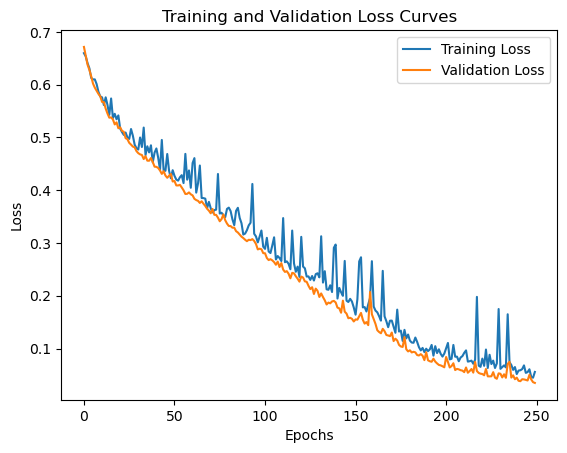

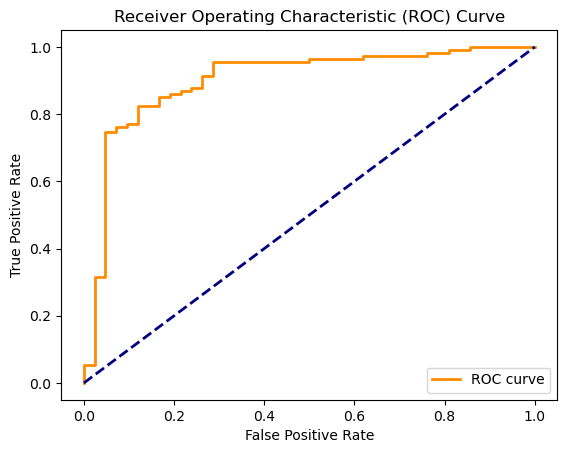

||TEST RESULTS|| 
  AUC:  0.902 
  Accuracy:  0.853


In [12]:
"""
Here shows the training and validation curves. AUC and ACC of test will also be printed.
"""

model = cnn_model
epochs = EPOCH_NUM

# train
train_losses, val_losses, trained_model = train(train_loader, model, criterion, optimizer, val_loader, epochs)

# show training and validation curves

# Plot the training and validation loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()

# test

auc, acc, true_labels, predicted_probabilities = test(test_loader, trained_model)

plot_roc_curve(true_labels, predicted_probabilities)


print(f'||TEST RESULTS|| \n  AUC: {auc: .3f} \n  Accuracy: {acc: .3f}') # round both to the first 3 digits

# 3D dataset NoduleMNIST3D

Please fill the blanks in the following block to create dataloaders for training, validation, and test on 3D dataset. The visualization of each dataset is expected.

{'python_class': 'NoduleMNIST3D', 'description': 'The NoduleMNIST3D is based on the LIDC-IDRI, a large public lung nodule dataset, containing images from thoracic CT scans. The dataset is designed for both lung nodule segmentation and 5-level malignancy classification task. To perform binary classification, we categorize cases with malignancy level 1/2 into negative class and 4/5 into positive class, ignoring the cases with malignancy level 3. We split the source dataset with a ratio of 7:1:2 into training, validation and test set, and center-crop the spatially normalized images (with a spacing of 1mm×1mm×1mm) into 28×28×28.', 'url': 'https://zenodo.org/record/6496656/files/nodulemnist3d.npz?download=1', 'MD5': '8755a7e9e05a4d9ce80a24c3e7a256f3', 'task': 'binary-class', 'label': {'0': 'benign', '1': 'malignant'}, 'n_channels': 1, 'n_samples': {'train': 1158, 'val': 165, 'test': 310}, 'license': 'CC BY 4.0'}
Using downloaded and verified file: C:\Users\moham\.medmnist\nodulemnist3d.npz


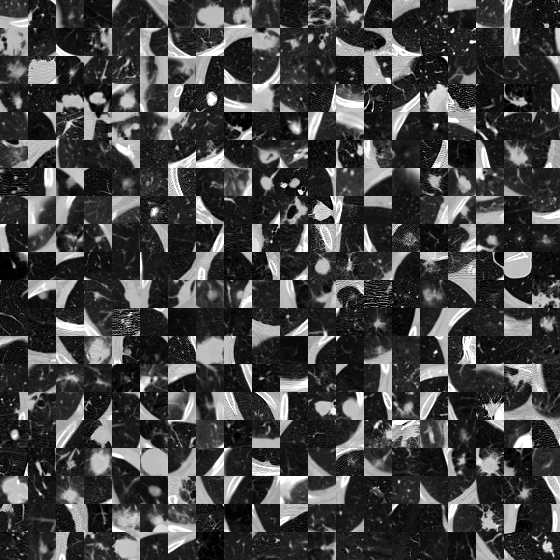

In [13]:
# hyparameters
BATCH_SIZE = 32
EPOCH_NUM = 100
lr = 0.0005

# dataset
data_flag_3d = 'nodulemnist3d' # here the name of dataset should be passed.
download = True

info = INFO[data_flag_3d] # INFO is embedded in the medmnist containing basic information of datasets
print(info)
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

# get the data class without transform
DataClass = getattr(medmnist, info['python_class'])

train_dataset = DataClass(split='train', transform= None, download=download)
val_dataset = DataClass(split='val', transform= None, download=download)
test_dataset = DataClass(split='test', transform= None, download=download)


# encapsulate data into dataloader form
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
# encapsulate datasets into Dataloader form

# show the details
print(train_dataset)
print("===================")
print(val_dataset)
print("===================")
print(test_dataset)
train_dataset.montage(length=20)[10]

## 3D CNN implementation

Similar to what you have completed, please fill the blanks in following methods.

You expected to design a 3D CNN with 5 layers along with batch normalization and pooling.

In [14]:
class CNN_3D(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN_3D, self).__init__()

        self.conv1 = nn.Conv3d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv3d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv3d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv3d(128, 256, kernel_size=3, stride=1, padding=1)
        self.conv5 = nn.Conv3d(256, 512, kernel_size=3, stride=1, padding=1)

        self.batchnorm1 = nn.BatchNorm3d(32)
        self.batchnorm2 = nn.BatchNorm3d(64)
        self.batchnorm3 = nn.BatchNorm3d(128)
        self.batchnorm4 = nn.BatchNorm3d(256)
        self.batchnorm5 = nn.BatchNorm3d(512)

        self.pool = nn.MaxPool3d(kernel_size=2, stride=2)

        self.dropout = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(512 * 1 * 1 * 1, 256)
        self.fc2 = nn.Linear(256, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        x = self.relu(self.batchnorm1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm3(self.conv3(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm4(self.conv4(x)))
        x = self.pool(x)
        x = self.relu(self.batchnorm5(self.conv5(x)))
        
        x = x.view(-1, 512 * 1 * 1 * 1)  # Flatten the tensor for fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        
        return x

# initialize the 3D model   
cnn3d_model = CNN_3D(n_channels, n_classes).to(device)


# define the BCE loss function and an optimizer you prefer

criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(cnn3d_model.parameters(), lr=lr, weight_decay=1e-5)

# show the details
from torchsummary import summary
SAMPLE_DATASIZE = train_dataset[0][0].shape # please pass the size of data size to SAMPLE_DATASIZE
summary(cnn3d_model, SAMPLE_DATASIZE, BATCH_SIZE)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [32, 32, 28, 28, 28]             896
       BatchNorm3d-2       [32, 32, 28, 28, 28]              64
              ReLU-3       [32, 32, 28, 28, 28]               0
         MaxPool3d-4       [32, 32, 14, 14, 14]               0
            Conv3d-5       [32, 64, 14, 14, 14]          55,360
       BatchNorm3d-6       [32, 64, 14, 14, 14]             128
              ReLU-7       [32, 64, 14, 14, 14]               0
         MaxPool3d-8          [32, 64, 7, 7, 7]               0
            Conv3d-9         [32, 128, 7, 7, 7]         221,312
      BatchNorm3d-10         [32, 128, 7, 7, 7]             256
             ReLU-11         [32, 128, 7, 7, 7]               0
        MaxPool3d-12         [32, 128, 3, 3, 3]               0
           Conv3d-13         [32, 256, 3, 3, 3]         884,992
      BatchNorm3d-14         [32, 256, 

## Training and evaluation

Please fill empty blanks in the following block and modify the train and test functions if it is necessary. Note that train and test functions should work for both 2D CNN and 3D CNN.

Epoch [1/100] Train Loss: 0.6338 Val Loss: 0.6514
Epoch [2/100] Train Loss: 0.6112 Val Loss: 0.5793
Epoch [3/100] Train Loss: 0.5778 Val Loss: 0.5604
Epoch [4/100] Train Loss: 0.5566 Val Loss: 0.5372
Epoch [5/100] Train Loss: 0.5450 Val Loss: 0.5161
Epoch [6/100] Train Loss: 0.5232 Val Loss: 0.5066
Epoch [7/100] Train Loss: 0.5131 Val Loss: 0.4819
Epoch [8/100] Train Loss: 0.5001 Val Loss: 0.4694
Epoch [9/100] Train Loss: 0.4843 Val Loss: 0.4623
Epoch [10/100] Train Loss: 0.4696 Val Loss: 0.4496
Epoch [11/100] Train Loss: 0.4749 Val Loss: 0.4370
Epoch [12/100] Train Loss: 0.4522 Val Loss: 0.4267
Epoch [13/100] Train Loss: 0.4421 Val Loss: 0.4152
Epoch [14/100] Train Loss: 0.4296 Val Loss: 0.4074
Epoch [15/100] Train Loss: 0.4219 Val Loss: 0.3987
Epoch [16/100] Train Loss: 0.4141 Val Loss: 0.3972
Epoch [17/100] Train Loss: 0.4069 Val Loss: 0.3763
Epoch [18/100] Train Loss: 0.3893 Val Loss: 0.3728
Epoch [19/100] Train Loss: 0.3986 Val Loss: 0.3576
Epoch [20/100] Train Loss: 0.3848 Val Lo

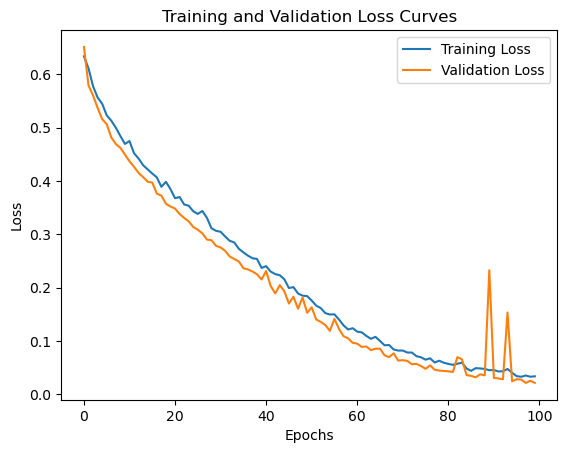

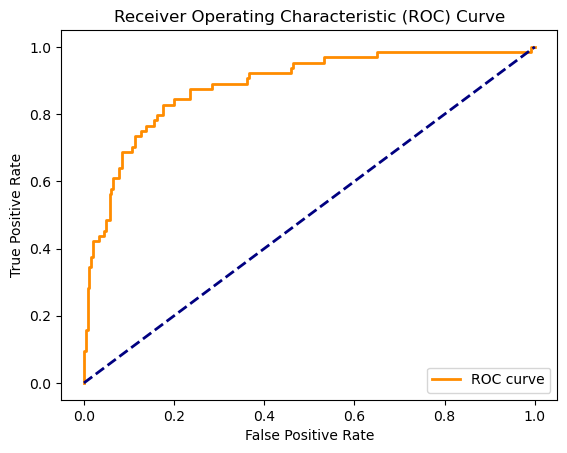

||TEST RESULTS|| 
  AUC:  0.885 
  Accuracy:  0.865


In [15]:
"""
Here shows the training and validation curves. AUC and ACC of test will also be printed.
"""
model = cnn3d_model
epochs = EPOCH_NUM

# train

train_losses, val_losses, trained_model = train(train_loader, model, criterion, optimizer, val_loader, epochs)

# show training and validation curves

# Plot the training and validation loss curves
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Curves')
plt.show()

# test

auc, acc, true_labels, predicted_probabilities = test(test_loader, trained_model)

plot_roc_curve(true_labels, predicted_probabilities)


print(f'||TEST RESULTS|| \n  AUC: {auc: .3f} \n  Accuracy: {acc: .3f}') # round both to the first 3 digits

# What are the strengths and weaknesses of classification models?
### In the previous tasks, you worked on CNN and 3D CNN. What are other networks that can realize image classification? (Please make at least 3 examples.) Could you discuss the pros and cons of CNNs and the networks you listed in medical image classification?

CNNs have multiple advantages and disadvantages. First of all, CNNs perform hierarchical feature learning, which means that they map represantations of an image ranking them with a feature level criterion. Secondly, convolutional layers automatically learn discriminative features, which are vital for giagnosis and analysis of medical imaging data. Furthermore, those features that are primarily used for classification can be provided to the user and give the opportunity for the user to fully interpret the function of the model. Neverteless, the two most significant drawbacks of a CNN is the fact that they heavily rely on large datasets. That being stated, it is true that medical imaging data can be either sparce or unstructured, which hinders the performance of CNNs using them. Additionally, the deeper a CNN gets the harder it is to use their interpretability and understand which features are significant due to their high number.

## Residual Neural Networks (ResNets):
### Pros:
ResNets are very deep networks that can learn complex features from medical images.
They use skip connections, which mitigate the vanishing gradient problem and facilitate training of very deep networks. 
The same property helps to better propagate the information of features and reduce overfitting

### Cons:
The increased depth can lead to overfitting if not properly regularized, which may require larger amounts of data for effective training. Also, training ResNets can be computationally intensive(high resources to be trained efficiently)


## DenseNet (Densely Connected Convolutional Networks):
### Pros:
DenseNets improve feature reuse by connecting each layer to every other layer in a feed-forward fashion, reducing the risk of overfitting.
They can achieve strong performance with fewer parameters.
### Cons:
DenseNets may require more memory during training compared to traditional CNNs, which could be a limitation in resource-constrained environments.
Training DenseNets can also be computationally intensive.

## ViT (Vision transformer)
### Pros:
The only network that does not depend on convolutional layers. Instead, it impliments attention mechanisms that allow to focus on certain features or regions of the image. This is quite beneficial for medical imaging appliactions because the model is able to establish relationships between distantly located features. Furthermore, transformers are scale-invariant, which means that the input-size of the image does not have to specific and that solves the issue of different image sizes that may appear in a single medical imaging dataset (which is also an advantage for all the Fully CNNs), or the need to resize images when merging different datasets.
### Cons
The biggest caveat when using transformers is the quite substantial amount of data required to train effectively and the corresponding computational resources they demand.